# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [55]:
# Import library dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import library untuk clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [29]:
df = pd.read_csv("bank_transactions_data_2.csv")
df

TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
5         TX000006   AC00393              92.15  2023-04-03 17:15:01   
6         TX000007   AC00199               7.08  2023-02-15 16:36:48   
7         TX000008   AC00069             171.42  2023-05-08 17:47:59   
8         TX000009   AC00135             106.23  2023-03-21 16:59:46   
9         TX000010   AC00385             815.96  2023-03-31 16:06:57   
10        TX000011   AC00150              17.78  2023-03-14 16:46:10   
11        TX000012   AC00459             190.02  2023-02-06 17:30:00   
12        TX000013   AC00392             494.52  2023-06-07 17:21:28   
13        TX000014   AC00264             781.76  2023-11-20 16:39:15   
14        TX000015   AC00085             166.99  2023-02-13 16:53:57   
15        TX000016   AC00270             465.45  2023-12-12 16:23:31   
16        TX000017   AC00317             555.80  2023-10-30 16:52:49   
17        TX000018   AC00359             492.93  2023-12-14 18:32:14   
18        TX000019   AC00242              18.68  2023-02-21 16:56:50   
19        TX000020   AC00285              71.48  2023-06-08 18:18:50   
20        TX000021   AC00002              59.32  2023-02-28 16:36:58   
21        TX000022   AC00014              85.77  2023-08-11 18:31:31   
22        TX000023   AC00095              52.20  2023-06-06 18:54:15   
23        TX000024   AC00453             345.84  2023-05-02 18:25:46   
24        TX000025   AC00241             145.54  2023-03-02 16:43:56   
25        TX000026   AC00041               7.49  2023-10-20 17:53:13   
26        TX000027   AC00441             246.93  2023-04-17 16:37:01   
27        TX000028   AC00057              40.32  2023-03-29 16:42:38   
28        TX000029   AC00390             127.45  2023-01-24 16:18:32   
29        TX000030   AC00313              56.17  2023-09-20 16:55:42   
30        TX000031   AC00367              28.31  2023-07-17 17:49:22   
31        TX000032   AC00291              59.12  2023-02-06 16:24:24   
32        TX000033   AC00060             396.45  2023-09-25 16:26:00   
33        TX000034   AC00359             877.81  2023-03-13 17:23:24   
34        TX000035   AC00365             255.26  2023-10-27 16:42:49   
35        TX000036   AC00267             124.76  2023-10-16 16:32:56   
36        TX000037   AC00404              78.13  2023-11-21 16:58:44   
37        TX000038   AC00202             649.28  2023-03-02 17:53:32   
38        TX000039   AC00478             795.31  2023-10-12 17:07:40   
39        TX000040   AC00405             335.63  2023-01-24 17:17:20   
40        TX000041   AC00421             328.47  2023-07-31 18:39:50   
41        TX000042   AC00480              34.02  2023-01-09 16:13:21   
42        TX000043   AC00120             241.42  2023-04-20 18:57:43   
43        TX000044   AC00117              55.32  2023-04-12 16:03:37   
44        TX000045   AC00011             304.31  2023-07-26 16:52:28   
45        TX000046   AC00401             435.27  2023-10-04 17:49:29   
46        TX000047   AC00282             164.49  2023-12-13 16:01:38   
47        TX000048   AC00439             510.24  2023-10-09 16:29:40   
48        TX000049   AC00296             626.90  2023-11-27 16:45:57   
49        TX000050   AC00471              22.01  2023-03-27 16:45:18   
50        TX000051   AC00159             425.34  2023-02-13 16:59:39   
51        TX000052   AC00482             424.56  2023-02-21 17:45:55   
52        TX000053   AC00115              85.43  2023-06-07 16:45:34   
53        TX000054   AC00055             169.50  2023-09-07 16:51:27   
54        TX000055   AC00419             104.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [31]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

In [32]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

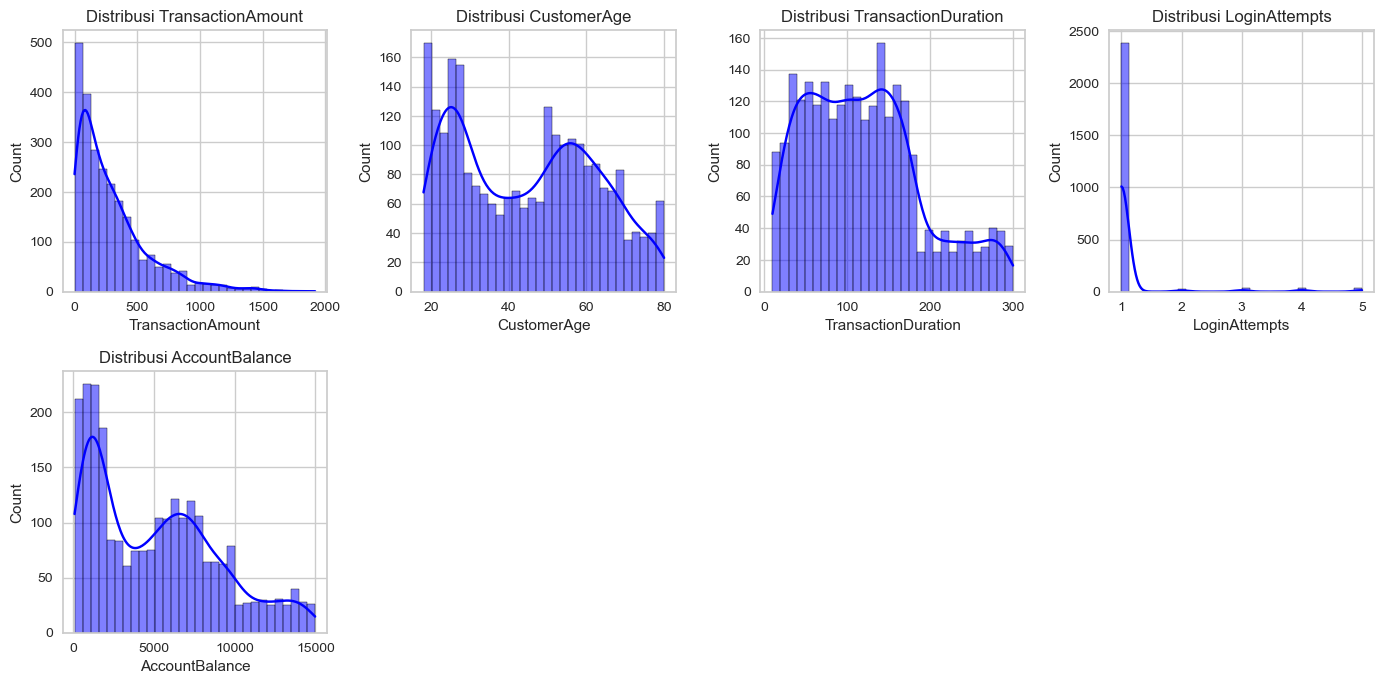

In [33]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

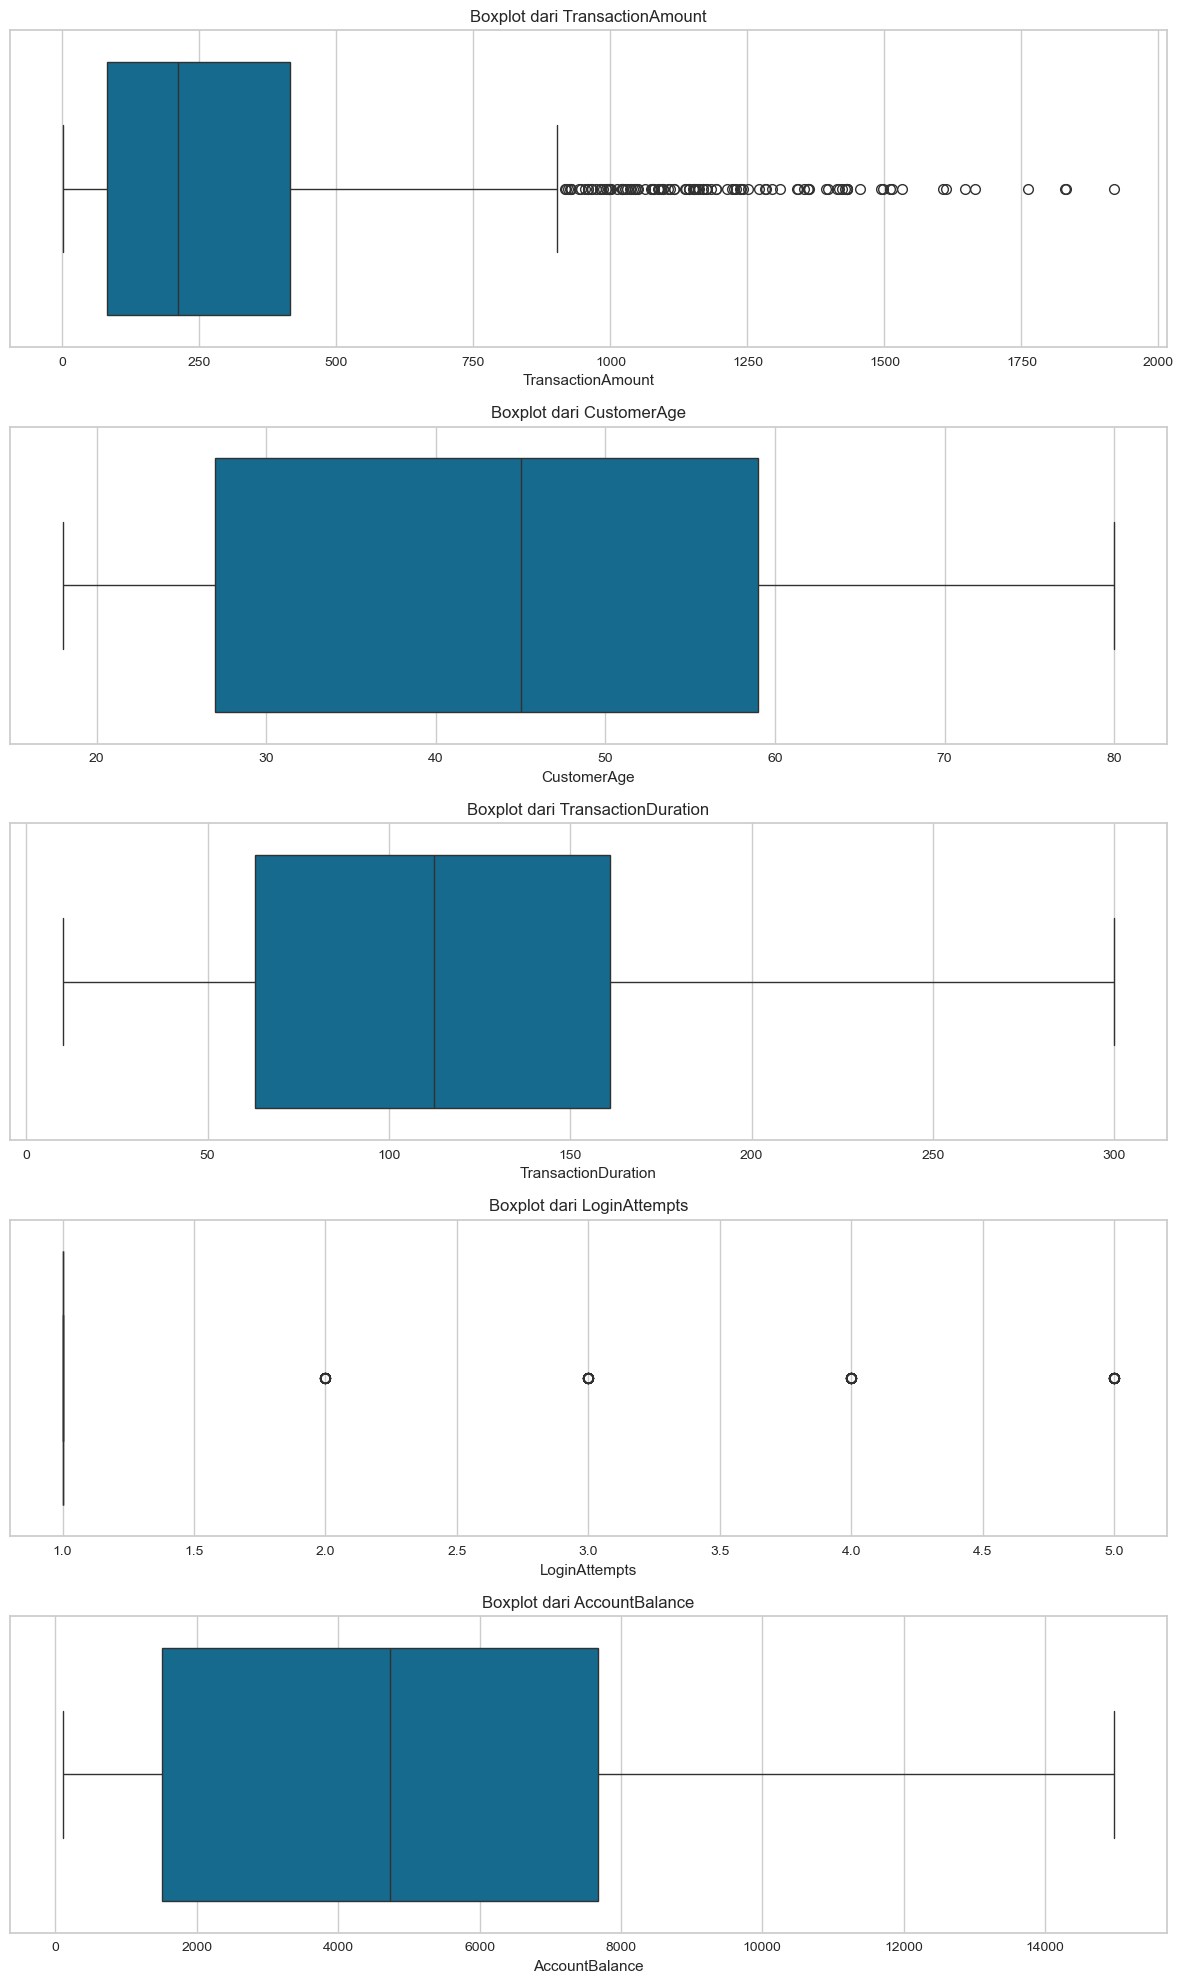

In [34]:
# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot boxplot untuk setiap fitur numerik
plt.figure(figsize=(12, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot dari {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

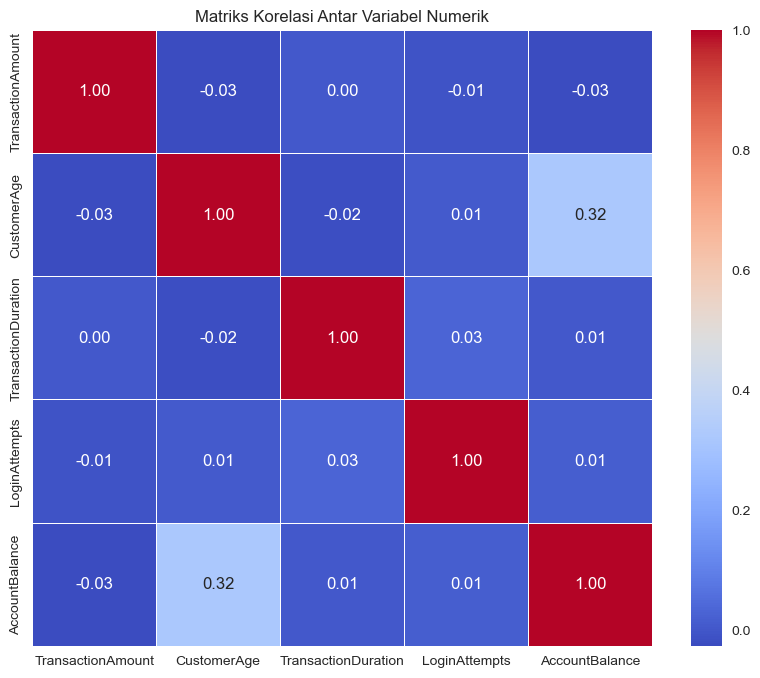

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

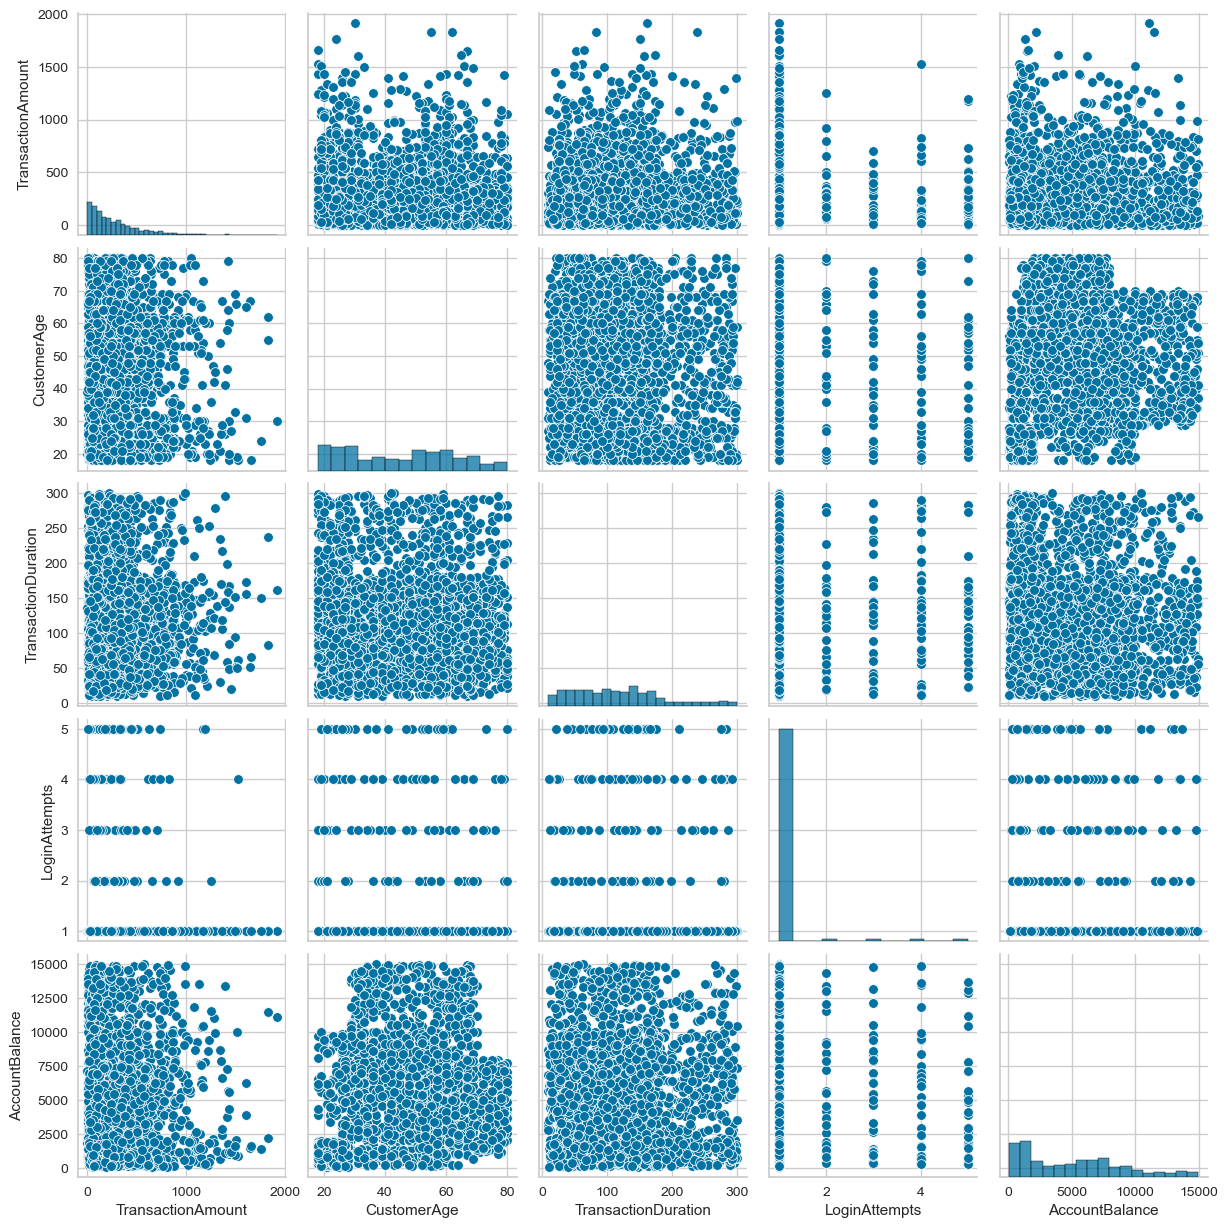

In [36]:
sns.pairplot(df[numeric_cols])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [37]:
# Mengatasi outlier pada TransactionAmount
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data yang berada dalam batas wajar
df = df[(df['TransactionAmount'] >= lower_bound) & (df['TransactionAmount'] <= upper_bound)]

In [38]:
# Daftar fitur yang akan dihapus
drop_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'TransactionDate', 'PreviousTransactionDate', 'MerchantID']

# Hapus fitur dari dataset
df.drop(columns=drop_columns, inplace=True)

df.head()

C:\Users\Alwan Fauzi\AppData\Local\Temp\ipykernel_16368\1857903926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_columns, inplace=True)


TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                   81              1         5112.21  
1             Doctor                  141              1        13758.91  
2            Student                   56              1         1122.35  
3            Student                   25              1         8569.06  
4            Student                  198              1         7429.40

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2399 non-null   float64
 1   TransactionType      2399 non-null   object 
 2   Location             2399 non-null   object 
 3   Channel              2399 non-null   object 
 4   CustomerAge          2399 non-null   int64  
 5   CustomerOccupation   2399 non-null   object 
 6   TransactionDuration  2399 non-null   int64  
 7   LoginAttempts        2399 non-null   int64  
 8   AccountBalance       2399 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 187.4+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder
category_features = df.select_dtypes(include=['object']).columns
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)
 
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
 
# Menampilkan hasil
df_lencoder

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0                 14.09                1        36        0           70   
1                376.24                1        15        0           68   
2                126.29                1        23        2           19   
3                184.50                1        33        2           26   
4                 13.45                0         1        2           26   
5                 92.15                1        28        0           18   
6                  7.08                0        39        0           37   
7                171.42                0        16        1           67   
8                106.23                0        11        1           51   
9                815.96                1        26        0           55   
10                17.78                0         0        2           52   
11               190.02                1        22        2           21   
12               494.52                0        23        1           24   
13               781.76                1        22        0           26   
14               166.99                1        21        2           18   
15               465.45                1        10        0           36   
16               555.80                0         2        1           19   
17               492.93                1         8        2           39   
18                18.68                0         0        1           59   
19                71.48                0         8        2           18   
20                59.32                1        20        1           71   
21                85.77                1        19        1           38   
22                52.20                1         1        2           39   
23               345.84                1        13        2           22   
24               145.54                1        33        2           21   
25                 7.49                0        15        2           65   
26               246.93                1        24        0           23   
27                40.32                1        25        1           37   
28               127.45                1        19        2           44   
29                56.17                1        11        1           27   
30                28.31                0        24        2           59   
31                59.12                1         3        0           29   
32               396.45                1        27        0           49   
33               877.81                1        20        2           22   
34               255.26                0        37        1           45   
35               124.76                1        39        1           49   
36                78.13                1        25        1           26   
37               649.28                1        38        0           75   
38               795.31                1        23        0           66   
39               335.63                1        28        2           55   
40               328.47                1        35        0           63   
41                34.02                1        30        2           38   
42               241.42                0         5        2           57   
43                55.32                1        40        0           19   
44               304.31                1        21        1           27   
45               435.27                1         6        1           74   
46               164.49                1         3        1           26   
47               510.24                1        28        2           19   
48               626.90                1        10        2           26   
49                22.01                0        34        2           41   
50               425.34                0        18        2           69   
51               424.56                1        29    

In [41]:
df_lencoder.dtypes

TransactionAmount      float64
TransactionType          int32
Location                 int32
Channel                  int32
CustomerAge              int64
CustomerOccupation       int32
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
dtype: object

In [42]:
df_lencoder = df_lencoder.astype('float64')

In [43]:
df_lencoder.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09              1.0      36.0      0.0         70.0   
1             376.24              1.0      15.0      0.0         68.0   
2             126.29              1.0      23.0      2.0         19.0   
3             184.50              1.0      33.0      2.0         26.0   
4              13.45              0.0       1.0      2.0         26.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                 0.0                 81.0            1.0         5112.21  
1                 0.0                141.0            1.0        13758.91  
2                 3.0                 56.0            1.0         1122.35  
3                 3.0                 25.0            1.0         8569.06  
4                 3.0                198.0            1.0         7429.40

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

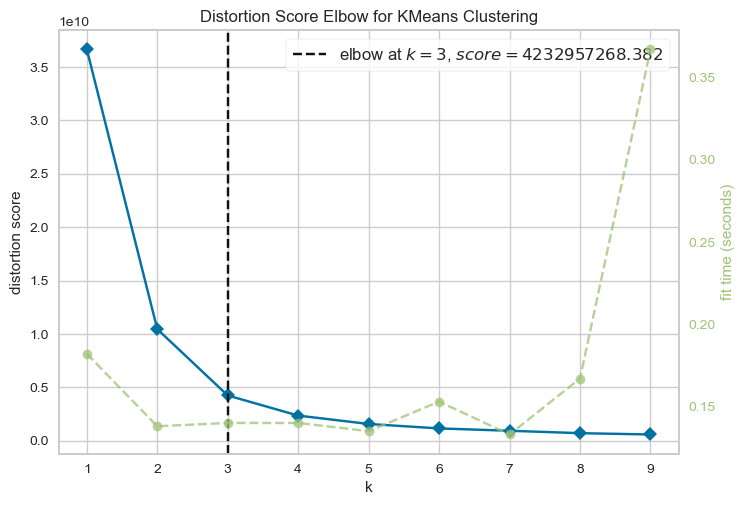

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_lencoder)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Menggunakan dataset hasil encoding
X = df_lencoder  # Data hasil encoding

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3 (hasil elbow method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Menambahkan label cluster ke dalam dataset
df_lencoder['Cluster'] = kmeans.labels_

# Fungsi untuk analisis karakteristik setiap cluster
def analyze_clusters(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[labels == cluster_id]

        # Menampilkan jumlah sampel dalam cluster
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Jumlah sampel: {len(cluster_data)}")

        # Menampilkan rata-rata dari setiap fitur dalam cluster
        print("Rata-rata fitur dalam cluster:")
        print(cluster_data.mean(numeric_only=True))

# Analisis karakteristik setiap cluster
analyze_clusters(df_lencoder, df_lencoder['Cluster'], k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Jumlah sampel: 1085
Rata-rata fitur dalam cluster:
TransactionAmount       255.969972
TransactionType           0.771429
Location                 21.383410
Channel                   0.971429
CustomerAge              37.719816
CustomerOccupation        2.201843
TransactionDuration     119.918894
LoginAttempts             1.119816
AccountBalance         1575.399475
Cluster                   0.000000
dtype: float64

Cluster 2:
Jumlah sampel: 914
Rata-rata fitur dalam cluster:
TransactionAmount       251.600788
TransactionType           0.776805
Location                 20.304158
Channel                   1.021882
CustomerAge              51.693654
CustomerOccupation        1.241794
TransactionDuration     117.966083
LoginAttempts             1.109409
AccountBalance         6530.677615
Cluster                   1.000000
dtype: float64

Cluster 3:
Jumlah sampel: 400
Rata-rata fitur dalam cluster:
TransactionAmount        261.553100
Transact

In [46]:
df_lencoder.head()

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09              1.0      36.0      0.0         70.0   
1             376.24              1.0      15.0      0.0         68.0   
2             126.29              1.0      23.0      2.0         19.0   
3             184.50              1.0      33.0      2.0         26.0   
4              13.45              0.0       1.0      2.0         26.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                 0.0                 81.0            1.0         5112.21   
1                 0.0                141.0            1.0        13758.91   
2                 3.0                 56.0            1.0         1122.35   
3                 3.0                 25.0            1.0         8569.06   
4                 3.0                198.0            1.0         7429.40   

   Cluster  
0        1  
1        2  
2        0  
3        1  
4        1

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [47]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_lencoder, df_lencoder['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")



Silhouette Score: 0.6274


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [48]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

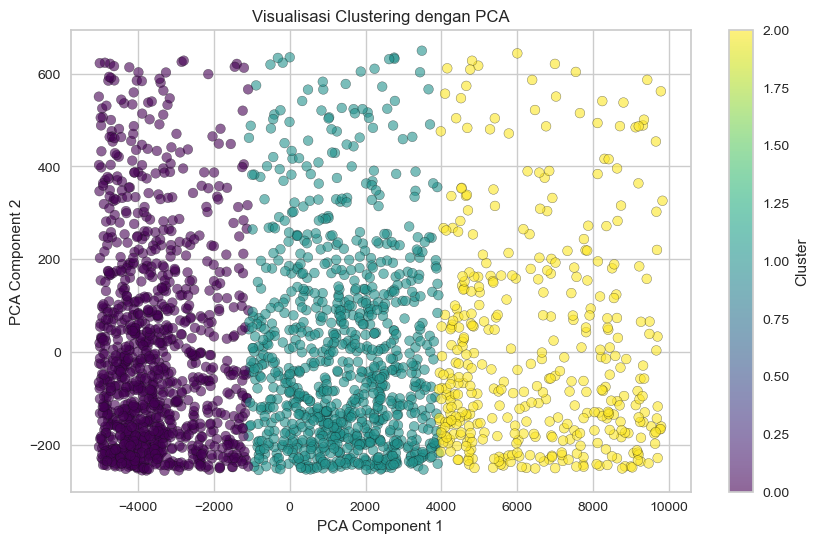

In [49]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_lencoder)

# Scatter plot hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_lencoder['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')

# Tambahkan label dan judul
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [50]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [51]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [52]:

# Menampilkan seluruh output tanpa terpotong
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Menampilkan mean, median, dan std untuk tiap fitur di setiap cluster
for feature in df_lencoder.columns[:-1]:  
    print(f"\nStatistik untuk fitur: {feature}")
    cluster_stats = df_lencoder.groupby('Cluster')[feature].agg(['mean', 'median', 'std', 'count'])
    print(cluster_stats.to_string())  # Menampilkan tabel tanpa pemotongan
    print("="*100)


Statistik untuk fitur: TransactionAmount
               mean  median         std  count
Cluster                                       
0        255.969972  198.92  217.257627   1085
1        251.600788  201.71  211.315859    914
2        261.553100  185.16  228.428011    400

Statistik untuk fitur: TransactionType
             mean  median       std  count
Cluster                                   
0        0.771429     1.0  0.420106   1085
1        0.776805     1.0  0.416616    914
2        0.762500     1.0  0.426084    400

Statistik untuk fitur: Location
              mean  median        std  count
Cluster                                     
0        21.383410    22.0  12.268765   1085
1        20.304158    20.0  12.210254    914
2        21.677500    22.0  12.205364    400

Statistik untuk fitur: Channel
             mean  median       std  count
Cluster                                   
0        0.971429     1.0  0.815053   1085
1        1.021882     1.0  0.793982    914
2     

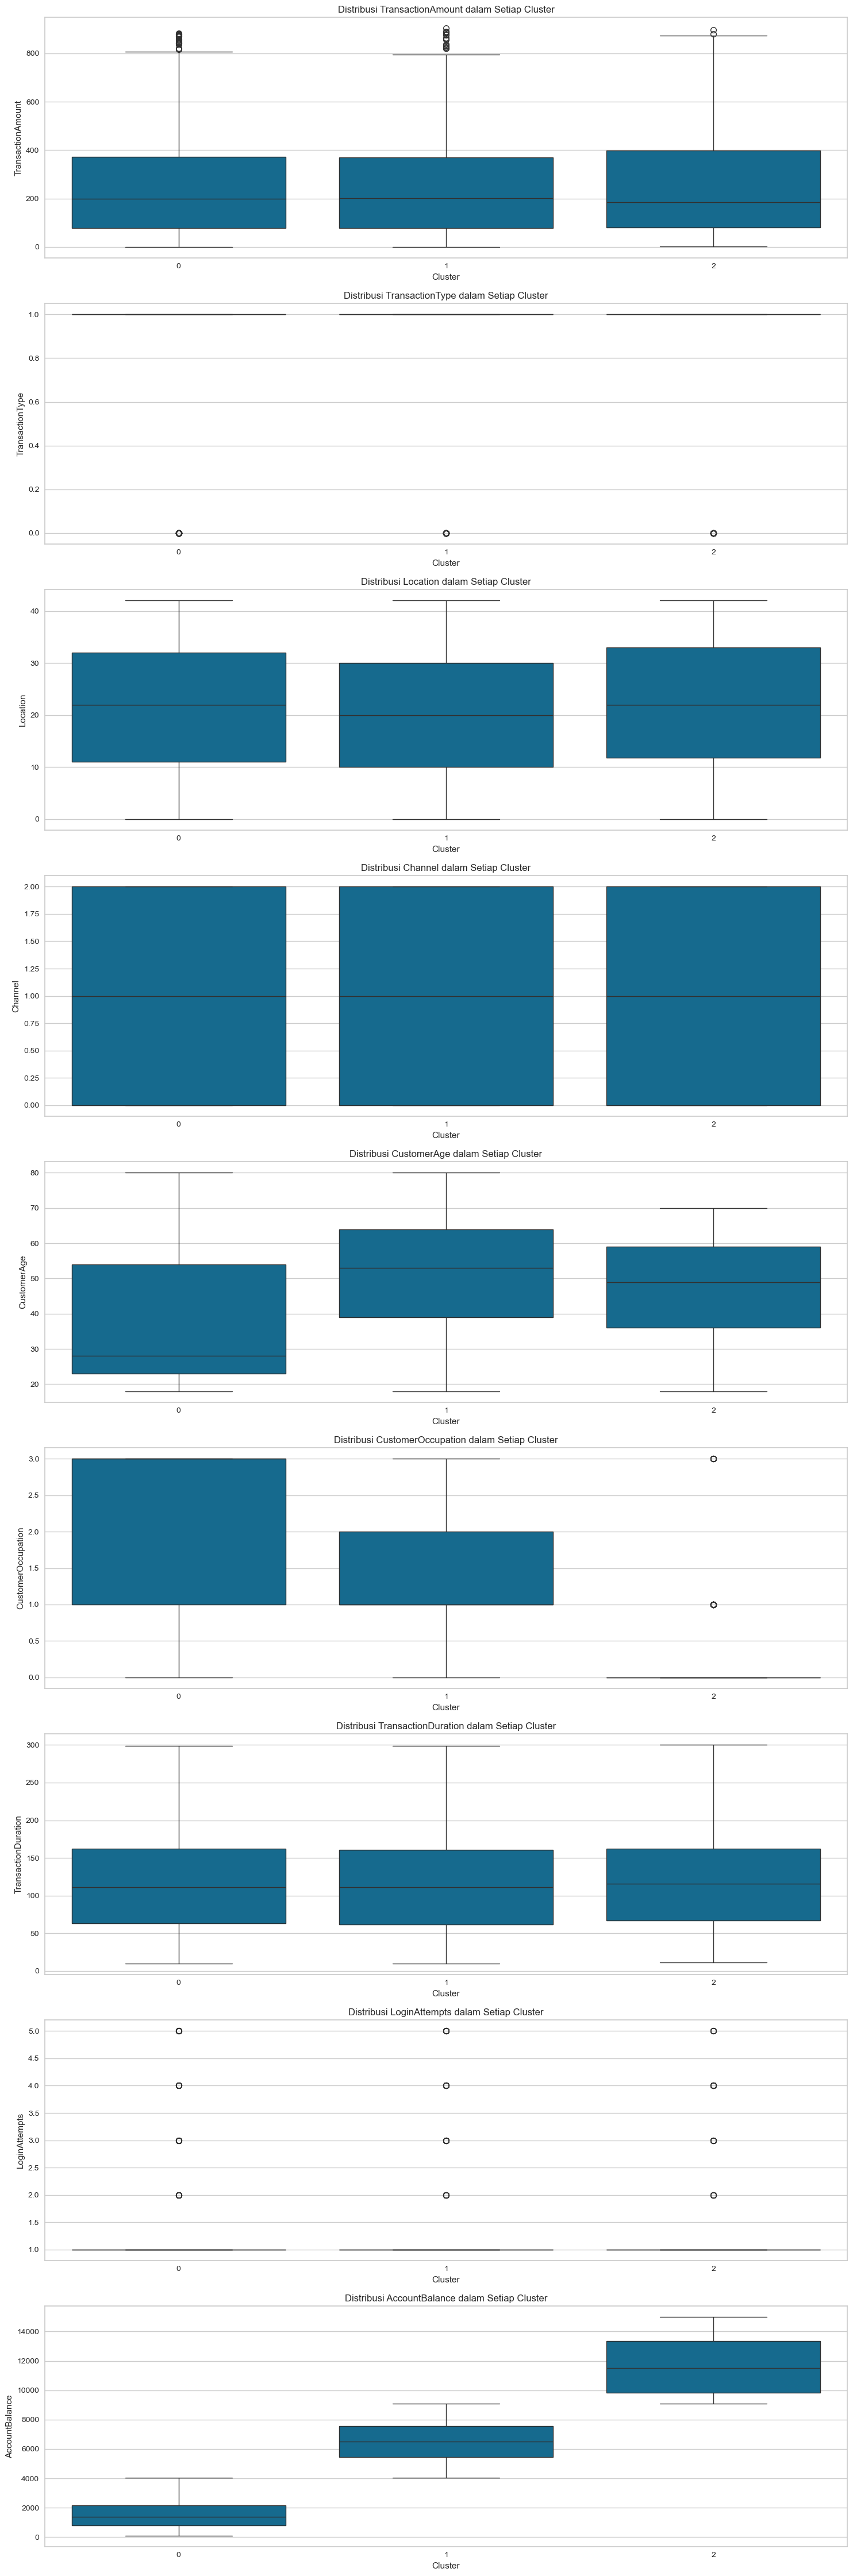

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat figure dengan ukuran besar untuk menampilkan beberapa plot
plt.figure(figsize=(15, 5 * len(df_lencoder.columns[:-1])))

# Loop untuk setiap fitur dalam df_reduced (kecuali kolom 'Cluster')
for i, feature in enumerate(df_lencoder.columns[:-1]):
    plt.subplot(len(df_lencoder.columns[:-1]), 1, i + 1)
    sns.boxplot(x=df_lencoder['Cluster'], y=df_lencoder[feature])
    plt.title(f'Distribusi {feature} dalam Setiap Cluster')

plt.tight_layout()
plt.show()



Tulis hasil interpretasinya di sini.
1. Cluster 0: Nasabah muda, saldo rendah, transaksi kecil, kemungkinan pelanggan baru atau berpenghasilan rendah.
2. Cluster 1: Nasabah lebih tua, saldo menengah, transaksi cukup stabil, kemungkinan pekerja mapan.
3. Cluster 2: Nasabah bersaldo besar, transaksi tinggi, aktivitas login lebih banyak,

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- TransactionAmount: Rata-rata transaksi $255.97, lebih kecil dibandingkan cluster lain.
- TransactionType: Mayoritas transaksi memiliki nilai 1, artinya lebih sering terjadi jenis transaksi tertentu.
- Location: Rata-rata lokasi transaksi di 21.38, hampir sama dengan cluster lainnya.
- Channel: Mayoritas transaksi dilakukan melalui channel 1.
- CustomerAge: Nasabah di cluster ini cenderung lebih muda, dengan usia rata-rata 37.72 tahun.
- CustomerOccupation: Mayoritas memiliki pekerjaan dengan nilai 2.20 (kemungkinan pekerja menengah).
- TransactionDuration: Rata-rata durasi transaksi 119.92 detik.
- LoginAttempts: Rata-rata percobaan login 1.12 kali, menunjukkan aktivitas login yang normal.
- AccountBalance: Rata-rata saldo rekening $1575.40, yang merupakan saldo paling kecil dibandingkan cluster lainnya.

**Kesimpulan** Cluster 0:
Kelompok ini terdiri dari nasabah yang lebih muda dengan saldo rendah dan jumlah transaksi kecil. Mereka mungkin pelanggan baru atau individu dengan aktivitas keuangan yang lebih sedikit.

## Cluster 1:
- TransactionAmount: Rata-rata transaksi $251.60, hampir sama dengan Cluster 0.
- TransactionType: Mayoritas transaksi memiliki nilai 1.
- Location: Rata-rata lokasi transaksi di 20.30.
- Channel: Rata-rata penggunaan channel 1.02, mirip dengan Cluster 0.
- CustomerAge: Rata-rata usia 51.69 tahun, lebih tua dibanding Cluster 0.
- CustomerOccupation: Mayoritas bekerja dengan nilai 1.24 (kemungkinan pekerja dengan jabatan lebih rendah dibanding Cluster 0).
- TransactionDuration: Rata-rata durasi transaksi 117.97 detik, sedikit lebih rendah dari Cluster 0.
- LoginAttempts: Rata-rata percobaan login 1.11 kali, masih dalam batas wajar.
- AccountBalance: Rata-rata saldo rekening $6530.68, jauh lebih tinggi dibanding Cluster 0, menunjukkan mereka memiliki lebih banyak dana.

**Kesimpulan** Cluster 1:
Cluster ini lebih tua dibanding Cluster 0, dengan saldo rekening lebih tinggi. Mereka mungkin nasabah tetap dengan aktivitas keuangan lebih stabil.

## Cluster 3:
- TransactionAmount: Rata-rata transaksi $261.55, sedikit lebih besar dibanding Cluster 0 dan 1.
- TransactionType: Mayoritas transaksi memiliki nilai 1.
- Location: Rata-rata lokasi transaksi di 21.68, sedikit lebih tinggi dari Cluster 1.
- Channel: Mayoritas menggunakan channel dengan nilai 0.98.
- CustomerAge: Rata-rata usia 47.68 tahun, lebih muda dari Cluster 1 tetapi lebih tua dari Cluster 0.
- CustomerOccupation: Mayoritas memiliki pekerjaan dengan nilai 0.23 (kemungkinan wirausaha atau tidak memiliki pekerjaan tetap).
- TransactionDuration: Rata-rata durasi transaksi 122.18 detik, lebih lama dibandingkan Cluster lainnya.
- LoginAttempts: Rata-rata percobaan login 1.18 kali, lebih tinggi dibanding cluster lainnya.
- AccountBalance: $11,631.72, saldo tertinggi di antara semua cluster.

**Kesimpulan** Cluster 2:
Cluster ini terdiri dari nasabah dengan saldo besar dan aktivitas transaksi lebih aktif. Mereka kemungkinan adalah nasabah premium atau orang dengan aktivitas bisnis tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [54]:
df_lencoder.to_csv("fixdataset.csv")